# Final Project

You will be asked to download data by yourselves and answer several data science questions through this final project. This project has two parts.


## Part 1 (15 Points):

This part contains 10 different data science questions that you are asked to answer. You need to download the corresponding data and write code to process the data to answer these questions. For each question, you need to provide your code to anser this question, as well as final answers. Each question will be worth 1.5 points in this part. 


## Final Submission:

Your final submission will contain two files:

1. The first would be this notebook. You need to provide code for your answers as well as your answers. You also need to provide visualization and executive summary using Markdown in this notebook. 

2. The second is the html version of this notebook. 


## Part 1

First, you need to download the most recent datasets containing listing and reviews in **Los Angeles** from [insidearibnb.com](http://insideairbnb.com/get-the-data.html). (September,2019,detailed data)You will then need to provide the code as well as answers to the following questions.

**To make sure that you downloaded the right dataset, your solution to Question 1 should be:**
1. **Number of unique listings = 45053**
2. **Number of unique hosts = 26286**

### Question 1: How many unique listings are there in the LA dataset? How many unique hosts are there?
**Question 1 Answer:**

There are 45053 unique listings and 26286 unique hosts in the dataset.
We put this data under the same file as this final_project Jupyter Notebook. We used read_csv function in pandas to get our data.

In [39]:
import pandas as pd
df = pd.read_csv("listings.csv")

[len(df.id.unique()),len(df.host_id.unique())]

[45053, 26286]

### Question 2: What is the mean, median, standard deviation, minimum and maximum of the number of listings per host in LA? (for each host, you only need to consider the listings from LA)
**Question 2 Answer:**

The mean of the number of listings per host is 1.71. The median is 1. The standard deviation is 2.999. The minimum is 1 and the maximum is 172.

In [2]:
num_listing = df.groupby(by=["host_id"])["id"].nunique()
num_mean = num_listing.mean()
num_median = num_listing.median()
num_std = num_listing.std()
num_min = num_listing.min()
num_max = num_listing.max()

[num_mean, num_median, num_std, num_min, num_max]

[1.7139541961500417, 1.0, 2.9991833369502245, 1, 172]

### Question 3: What is the average and standard deviation number of listings for a super host versus a non-super host? Does super host or non-super host have more listings on average?
**Question 3 Answer:**

For superhost, the average number and standard deviation of the number of listings are 1.82 and 3.18 respectively. 
For non-superhost, the average number and standard deviation of the number of listings are 1.67 and 2.93 respectively.
We can tell that superhost does have more listings than non-superhost on average.

In [3]:
# You need to provide the code to answer the previous quesiton

data = {"num_listing":df.groupby(by=["host_id"])["id"].nunique(),\
        "superhost":df.groupby(by=["host_id"])["host_is_superhost"].unique()}
df2 = pd.DataFrame(data)

s_listing=[]
ns_listing=[]
for host in df2.index:
    if df2.loc[host]["superhost"]=='t':
        s_listing.append(df2.loc[host]["num_listing"])
    elif df2.loc[host]["superhost"]=='f':
        ns_listing.append(df2.loc[host]["num_listing"])

data3 = {"s_listing":s_listing}
df_superhost = pd.DataFrame(data3)
data4 = {"ns_listing":ns_listing}
df_non_superhost = pd.DataFrame(data4)

mean_s = df_superhost["s_listing"].mean()
std_s = df_superhost["s_listing"].std()
mean_ns = df_non_superhost["ns_listing"].mean()
std_ns = df_non_superhost["ns_listing"].std()

[mean_s, std_s, mean_ns, std_ns]



[1.8242638078436695, 3.177892161908471, 1.6710213148569313, 2.926275546477842]

### Question 4: What are the unique types of host verifications are there? (It doesn't matter if you include "None" or empty string as a type)
**Question 4 Answer:**

There are 22 unique types of host verifications. The list of unique types is shown as below.

In [4]:
# You need to provide the code to answer the previous quesiton
unique_v = []

for n in df["host_verifications"]:
    hv = n.strip('[]').split(',')
    for m in hv:
        sm=m.strip(' ').strip('\'')
        if sm not in unique_v:
            unique_v.append(sm)
            
unique_v, len(unique_v)

(['email',
  'phone',
  'facebook',
  'reviews',
  'kba',
  'jumio',
  'government_id',
  'offline_government_id',
  'selfie',
  'identity_manual',
  'work_email',
  'manual_online',
  'manual_offline',
  'google',
  '',
  'sent_id',
  'None',
  'sesame',
  'sesame_offline',
  'photographer',
  'zhima_selfie',
  'weibo'],
 22)

### Question 5: What are the five most popular verification types of hosts? For each type of the top five verifications, how many percent of hosts verify that type?
**Question 5 Answer:**

There are 26286 unique hosts in this dataset. We removed the duplicates firstly, then we compute the occurrence of each verification type.
The 5 most popular verification types are phone, email, reviews, government_id, and jumio. Around 99.68%, 93.84%, 68.85%, 58.77%, and 43.34% of hosts use those 5 verification types respectively.

In [5]:
# You need to provide the code to answer the previous quesiton

df_host = df.drop_duplicates(keep="first",subset=["host_id"])
v_type={}
for n in (df_host["host_verifications"]):
    hv = n.strip('[]').split(',')
    for m in hv:
        sm=m.strip(' ').strip('\'')
        if sm not in v_type:
            v_type[sm]=1
        else:
            v_type[sm]+=1

            
v_keys_list=[i for i in v_type.keys()] 
v_values_list=[j for j in v_type.values()]    
df_vhost = pd.DataFrame(columns=["Verification type","Amount of hosts"])
df_vhost["Verification type"]=v_keys_list
df_vhost["Amount of hosts"]=v_values_list
df_vhost.sort_values(by="Amount of hosts",inplace=True,ascending=False)
df_vhost.reset_index(drop=True,inplace=True)
df_vhost["Percentage"]= df_vhost["Amount of hosts"].\
apply(lambda x: "{:.2%}".format(x/df_host.shape[0]))
df_vhost.head(5)



,Verification type,Amount of hosts,Percentage
0,phone,26201,99.68%
1,email,24666,93.84%
2,reviews,18099,68.85%
3,government_id,15448,58.77%
4,jumio,11392,43.34%


### Question 6: What is the mean, standard deviation of the average price of a listing in Los Angles from 01/01/2020 to 03/01/2020 (inclusive)? (For listings that are not available in this time, you should not count them in the average price.)

**Question 6 Answer:**

Firstly, we sort out the rows or listing ids that are between those two dates. Then we use "group by" to calculate the mean and standard deviation accordingly.
The final result is: the mean is 254.78 and the standard deviation is 684.74.


In [65]:
pd.options.mode.chained_assignment = None
import numpy as np

In [66]:
df_ca = pd.read_csv("./calendar.csv")
df1 = df_ca.copy()
df1["date"]=pd.to_datetime(df1["date"])

In [48]:

df2 = df1.loc[(df1.date >= pd.Timestamp(2020,1,1,0))&(df1.date <= pd.Timestamp(2020,3,1,0))& (df5.available=='t'), :]
df2.sort_values(by = ["listing_id","date"],inplace=True, ascending = [True,True])
df2.reset_index(drop=True, inplace=True)

df2["price"] = df2["price"].apply(lambda x: str(x))
df2["price"] = df2["price"].apply(lambda x: x.strip("$").replace(",",""))
df2["price"] = df2["price"].apply(lambda x: float(x))
df_los = df2.groupby(by=["listing_id"]).apply(lambda x: pd.Series\
                                              ({"price_mean":np.mean(x["price"])}))

np.mean(df_los["price_mean"]),np.std(df_los["price_mean"])


(254.77822712824755, 684.741767482515)

### Question 7: For reviews that are written in Jan, 2016, what are the most popular ten words except stopping words? What about reviews written in March, 2017 and April, 2018?
**Hint**: You need to use NTLK stopping words to find the stopping words in Python. You also need to remove punctuation and numbers

**Question 7 Answer:**

For reviews that were written in Jan, 2016. The top ten words are "great", "stay", "place", "clean", "location", "house", "us", "nice", "would", and "host".
For reviews that were written in May, 2017. The top ten words are "great", "place", "stay", "location", "clean", "nice", "would", "host", "house", and "comfortable".
For reviews that were written in April, 2018. The top ten words are "great", "place", "stay", "location", "clean", "would", "nice", "host", "house", and "la".

In [42]:
df_re = pd.read_csv("./reviews.csv")

In [44]:
# Jan, 2016

df31 = df_re.copy()
df31["date"]=pd.to_datetime(df31["date"])

df31 = df31.loc[(df31.date >= pd.Timestamp(2016,1,1,0))&(df31.date <= pd.Timestamp(2016,1,31,0)), :]
df31.reset_index(drop=True, inplace=True)

word_count = {}

import nltk
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
import string
from string import digits

df31["comments"] = df31["comments"].apply(lambda x: str(x))

comments = df31["comments"].values.tolist()
for line in comments:
    clean_line = line.lower().translate(str.maketrans('','',string.punctuation)).\
    translate(str.maketrans('', '', digits)).replace("\n","")
    for word in clean_line.split(" "):
        word = word.strip(" ")
        if word not in word_count and word not in stopwords and word !='':
            word_count[word]=1
        if word in word_count:
            word_count[word]+=1
col1=[]
col2=[]
for i in word_count.keys():
    col1.append(i)
    col2.append(word_count[i])
df_wd1 = pd.DataFrame(columns = ["Word","Count"])
df_wd1["Word"]=col1
df_wd1["Count"]=col2
df_wd1.sort_values(by=["Count"],inplace=True,ascending=False)
df_wd1.reset_index(drop=True, inplace=True)
df_wd1.head(10)

,Word,Count
0,great,5380
1,stay,4664
2,place,4288
3,clean,2721
4,location,2696
5,house,2643
6,us,2633
7,nice,2408
8,would,2390
9,host,2328


In [45]:
# March 2017
df32 = df_re.copy()
df32["date"]=pd.to_datetime(df32["date"])

df32 = df32.loc[(df32.date >= pd.Timestamp(2017,3,1,0))&(df32.date <= pd.Timestamp(2017,3,31,0)), :]
df32.reset_index(drop=True, inplace=True)

word_count = {}

df32["comments"] = df32["comments"].apply(lambda x: str(x))
comments = df32["comments"].values.tolist()
for line in comments:
    clean_line = line.lower().translate(str.maketrans('','',string.punctuation)).\
    translate(str.maketrans('', '', digits)).replace("\n","")
    for word in clean_line.split(" "):
        word = word.strip(" ")
        if word not in word_count and word not in stopwords and word !='':
            word_count[word]=1
        if word in word_count:
            word_count[word]+=1
col1=[]
col2=[]
for i in word_count.keys():
    col1.append(i)
    col2.append(word_count[i])
df_wd2 = pd.DataFrame(columns = ["Word","Count"])
df_wd2["Word"]=col1
df_wd2["Count"]=col2
df_wd2.sort_values(by=["Count"],inplace=True,ascending=False)
df_wd2.reset_index(drop=True, inplace=True)
df_wd2.head(10)

,Word,Count
0,great,12202
1,place,11539
2,stay,9463
3,location,5875
4,clean,5455
5,nice,4547
6,would,4544
7,host,4436
8,house,3779
9,comfortable,3762


In [46]:
# April 2018
df33 = df_re.copy()
df33["date"]=pd.to_datetime(df33["date"])

df33 = df33.loc[(df33.date >= pd.Timestamp(2018,4,1,0))&(df33.date <= pd.Timestamp(2018,4,30,0)), :]
df33.reset_index(drop=True, inplace=True)

word_count = {}

df33["comments"] = df33["comments"].apply(lambda x: str(x))

comments = df33["comments"].values.tolist()
for line in comments:
    clean_line = line.lower().translate(str.maketrans('','',string.punctuation)).\
    translate(str.maketrans('', '', digits)).replace("\n","")
    for word in clean_line.split(" "):
        word = word.strip(" ")
        if word not in word_count and word not in stopwords and word !='':
            word_count[word]=1
        if word in word_count:
            word_count[word]+=1
col1=[]
col2=[]
for i in word_count.keys():
    col1.append(i)
    col2.append(word_count[i])
df_wd3 = pd.DataFrame(columns = ["Word","Count"])
df_wd3["Word"]=col1
df_wd3["Count"]=col2
df_wd3.sort_values(by=["Count"],inplace=True,ascending=False)
df_wd3.reset_index(drop=True, inplace=True)
df_wd3.head(10)

,Word,Count
0,great,18844
1,place,18665
2,stay,14746
3,location,10011
4,clean,9051
5,would,7328
6,nice,6807
7,host,6800
8,house,5523
9,la,5511


### Question 8: Which five zipcode has the highest average listing price and has at least 30 listings (again only considering available dates) between 2020-01-01 to 2020-02-01 (inclusive)? What are these listing prices? What are the number of active listings and number of hosts in these top five zipcodes (a listing is active if it has at least one available date in the calendar data)?

**Question 8 Answer:**

These 5 zipcodes are 90210, 90077, 90265, 90069, and 91436. 
The corresponding average listing prices are 1963.56, 1909.07, 1559.61, 998.11, and 742.66 respectively.
The number of active listings are 346, 92, 412, 563, and 59. The number of hosts are 262, 68, 321, 473, and 51.

In [67]:
df4 = df_ca.copy()
df4["date"]=pd.to_datetime(df4["date"])

#convert the "price" data
df4["price"] = df4["price"].apply(lambda x: str(x))
df4["price"] = df4["price"].apply(lambda x: x.strip("$").replace(",",""))
df4["price"] = df4["price"].apply(lambda x: float(x))

#add "zipcode" and "host_id" to the calendar dataset
df_zip = df.loc[:,["id","host_id","zipcode"]]
df4 = df4.merge(df_zip, how="left", left_on="listing_id",right_on="id")


In [68]:
df41 = df4.loc[:,["zipcode","listing_id","host_id","price"]]

df42 = df4.loc[(df4.date >= pd.Timestamp(2020,1,1,0))&(df4.date <= pd.Timestamp(2020,2,1,0))\
               & (df4.available=='t'), :]
df42.reset_index(drop=True, inplace=True)

df_30 = df42.groupby(by=["zipcode"]).filter(lambda x: x["listing_id"].nunique()>=30)

In [86]:
# Average Price
from pandasql import sqldf
df_5_zipcode = sqldf("SELECT zipcode, avg(price) as Avg_Price FROM df_30 GROUP BY zipcode ORDER BY Avg_Price desc LIMIT 5;")
df_5_zipcode

,zipcode,Avg_Price
0,90210,1963.557367
1,90077,1909.066130
2,90265,1559.605010
3,90069,998.113153
4,91436,742.660019


In [87]:
# Number of active listings
df_active_listing = df4.loc[df4.available=='t', :]

sqldf("SELECT zipcode, count(distinct id) as active_listing FROM df_active_listing \
WHERE zipcode in (SELECT zipcode FROM df_5_zipcode) GROUP BY zipcode")


,zipcode,active_listing
0,90069,563
1,90077,92
2,90210,346
3,90265,412
4,91436,59


In [88]:
# Number of hosts
sqldf("SELECT zipcode, count(distinct host_id) as host_id_num FROM df WHERE zipcode in \
(SELECT zipcode FROM df_5_zipcode) GROUP BY zipcode")

,zipcode,host_id_num
0,90069,473
1,90077,68
2,90210,262
3,90265,321
4,91436,51


### Question 9: Focusing on the data from 2020-01-01 to 2020-04-01 (inclusive), what are five zipcodes that have at least 30 listings and have the largest absolute difference between the average prices on weekends versus the average prices on weekdays? (Weekends = Saturday and Sunday). Please give the zipcodes as well as the listing prices
**Question 9 Answer:**

Here we are focusing on the data between the dates only. Therefore, unlike question 8 where we might use the entire dataset to calculate the number of hosts. In this question, we only use the data that's within the time zones. The 5 zipcodes that have the largest absolute difference are 90265, 91325, 91436, 90293, and 90048. The listing prices on both Weekdays and Weekends, and the difference between those two are shown as below.

In [6]:
df5 = df_ca.copy()
df5["date"]=pd.to_datetime(df5["date"])
df5["price"] = df5["price"].apply(lambda x: str(x))
df5["price"] = df5["price"].apply(lambda x: x.strip("$").replace(",",""))
df5["price"] = df5["price"].apply(lambda x: float(x))


In [7]:
df51 = df5.loc[(df5.date >= pd.Timestamp(2020,1,1,0))&(df5.date <= pd.Timestamp(2020,4,1,0))\
               & (df5.available=='t'), :]
df51["DayOfWeek"]=df51.date.dt.weekday_name
df51 = df51[["listing_id","price","DayOfWeek"]]
df51 = df51.merge(df_zip, how="left", left_on="listing_id",right_on="id")
df51 = df51[["listing_id","price","DayOfWeek","zipcode"]]

In [8]:
df_30again = df51.groupby(by=["zipcode"]).filter(lambda x: x["listing_id"].nunique()>=30)


In [5]:
from pandasql import sqldf

In [9]:
df_weekday = sqldf("SELECT zipcode,listing_id, price, DayOfWeek from df_30again \
WHERE DayOfWeek!='Saturday' and DayOfWeek!='Sunday'")
df_weekend = sqldf("SELECT zipcode, listing_id, price, DayOfWeek from df_30again \
WHERE DayOfWeek='Saturday' or DayOfWeek='Sunday'")


In [11]:
df_wd= sqldf("SELECT zipcode, avg(price) as Avg_wd_price FROM df_weekday GROUP BY zipcode")

In [12]:
df_we= sqldf("SELECT zipcode, avg(price) as Avg_we_price FROM df_weekend GROUP BY zipcode")

In [16]:
df_all = sqldf("SELECT A.zipcode,Avg_wd_price,Avg_we_price FROM df_wd AS A \
JOIN df_we AS B ON A.zipcode=B.zipcode")


In [47]:
df_all["difference"] = (df_all["Avg_wd_price"] - df_all["Avg_we_price"] ).abs()
df_all.sort_values(by="difference",ascending=False).reset_index(drop=True).head(5)

,zipcode,Avg_wd_price,Avg_we_price,difference
0,90265,1559.885295,1584.619098,24.733803
1,91325,303.016354,318.357696,15.341341
2,91436,704.748236,717.131461,12.383224
3,90293,274.940936,286.859906,11.918970
4,90048,415.569997,426.101584,10.531587


### Question 10: What is the average and standard deviation of the daily total capacity at Airbnb Los Angeles from 2020-01-01 to 2020-04-01? The daily total capacity in a day is the number of beds that are available in that given date. What is the average and standard deviation of the daily price per bed at Airbnb Los Angeles from 2020-01-01 to 2020-04-01?
**Question 10 Answer:**

The mean and standard deviation of the daily total capacity are 47091.65 and 4894.02.
The mean and standard deviation of the daily price per bed are 124.06 and 5.60.

In [23]:
df6 = df_ca.copy()
df6["date"]=pd.to_datetime(df6["date"])
df6["price"] = df6["price"].apply(lambda x: str(x))
df6["price"] = df6["price"].apply(lambda x: x.strip("$").replace(",",""))
df6["price"] = df6["price"].apply(lambda x: float(x))

In [28]:
df61 = df6.loc[(df6.date >= pd.Timestamp(2020,1,1,0))&(df5.date < pd.Timestamp(2020,4,1,0))\
               & (df6.available=='t'), :]
df_bed = df[["id","beds"]]
df61 = df61.merge(df_bed, how="left", left_on="listing_id",right_on="id")
df61 = df61[["listing_id","date","price","beds"]]


In [50]:
df_capacity = sqldf("SELECT date, sum(beds) as Total_capacity, sum(price) as Total_price FROM df61 GROUP BY date")

np.mean(df_capacity["Total_capacity"]),np.std(df_capacity["Total_capacity"])

(47091.64835164835, 4894.024846179753)

In [37]:
df_daily = sqldf("SELECT date, (Total_price/Total_capacity) as daily_price FROM df_capacity")

np.mean(df_daily["daily_price"]),np.std(df_daily["daily_price"])

(124.06037237364912, 5.602549542378102)

## Part 2 (15 Points):

In this part, you need to find **5** interesting business questions out of the datasets. You then need to write Python code to answer the questions. Last, you need to write a 200-word summary of your answers and business insights you get from ansewr these 5 questions baed on your code. You will be evaluated based on the following criterion:

1. You need to ask three business-relevant questions (2 points)
2. You need to answer these three questions using Python and the datasets (1 points)
3. You have at least **5** graphs to visualize your insights (2 points)
4. Your executive summary of your answers are well-written and make sense (5 points)
5. Your business insights are very interesting and the report is creative (5 points)


**(You need to use this cell to write your 5 questions)**

**Question 1:**
What are the top 20 used amenities in all houses in the dataset? (You may use the amenities column) Please also use a bar chart to visulize it. 

**Question 2:**
Use scatter plot to see if there is a pattern between number of reviews of a host and the review score rating of a host. 

**Question 3:**
Does the minimum amount of booking affect the vacancy rate of each house? You should label the houses with minimum_night less than 10 as Low, within the range of 11-31 as middle, and over 31 as high.  

**Question 4:**
Plot a graph to show the numbers of each cancellation policy for all the hosts. Which kind of cancellation policy is most widely used by hosts?

**Question 5:**
What are the top 10 property type that have the highest reviews rating? Also, what are the proportion of each room type, and what are their ratings? Is there one room type has ratings significantly higher than others?



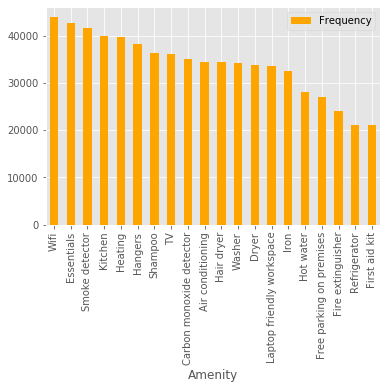

In [40]:
# Your code to answer Question 1
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

a_type={}

for n in (df["amenities"]):
    aa = n.strip('{}').split(',')
    for i in aa:
        ii=i.strip(' ').strip('\"')
        if ii not in a_type:
            a_type[ii]=1
        else:
            a_type[ii]+=1

df1 = pd.DataFrame(sorted(a_type.items(),key = lambda item:item[1],reverse = True)[:20])
df1.columns = ['Amenity','Frequency']

df1[["Amenity","Frequency"]].plot(kind = "bar",x = "Amenity",y = "Frequency",color="orange")

(-0.5, 399.5, 199.5, -0.5)

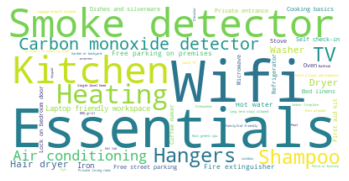

In [41]:
#! pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

my_wordcloud = WordCloud(background_color="white").\
generate_from_frequencies(frequencies=a_type)

plt.imshow(my_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

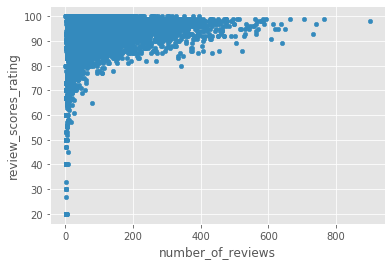

In [6]:
# Your code to answer Question 2
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
fig,ax = plt.subplots()
df.plot(kind= "scatter", x = "number_of_reviews", y = "review_scores_rating", ax=ax)

#There is a pattern between the number of reviews of a host and the review score rating of a host.
#As the number of reviews increases, it is less likely that the scores rating might be low.
#In other words, if the number of reviews is very low, the scores rating is more possible to be lower than average.

/Users/alexa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,availability_30,availability_60,availability_90
level_min_nights,,,
high,16.290389,35.903885,57.053170
low,12.402993,28.498871,46.147419
middle,11.947655,28.528313,47.586106


(0, 50)

[Text(0, 0.5, 'Availability'),
 Text(0.5, 0, 'Level of Minimum Nights'),
 Text(0.5, 1.0, 'The effect of Minimum Night Booking on Vacancy Rate')]

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x14ca58358>)

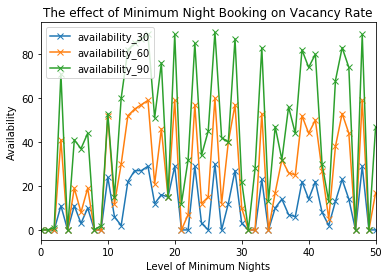

In [36]:
# Your code to answer Question 3
import matplotlib.pyplot as plt

new_df = df[["minimum_nights","availability_30","availability_60","availability_90"]]
def level(nights):
    if nights < 10:
        return "low"
    elif nights < 32:
        return "middle"
    else:
        return "high"
new_df["level_min_nights"] = new_df.minimum_nights.apply(level)

new_df.groupby(by = ["level_min_nights"])["availability_30","availability_60","availability_90"].mean()

fig,ax = plt.subplots()
ax.set_xlim([0,50])

x = list(new_df.index)
ava_30 = list(new_df["availability_30"])
ava_60 = list(new_df["availability_60"])
ava_90 = list(new_df["availability_90"])

plt.plot(x,ava_30,"x-",label="availability_30")
plt.plot(x,ava_60,"x-",label="availability_60")
plt.plot(x,ava_90,"x-",label="availability_90")

ax.set(title = "The effect of Minimum Night Booking on Vacancy Rate",xlabel = "Level of Minimum Nights",\
       ylabel = "Availability")
ax.legend(loc=0)
fig,ax

#The minimum amount of booking does not have evident affect on the vacancy rate of each house.
#However, it seems like listings with a lower limit of booking nights (< 10) tends to have lower vacancy rate.

array(['strict_14_with_grace_period', 'flexible', 'moderate',
       'super_strict_30', 'strict', 'super_strict_60', 'luxury_moderate',
       'luxury_super_strict_95', 'luxury_no_refund'], dtype=object)

{'strict_14_with_grace_period': 19305,
 'flexible': 13168,
 'moderate': 12038,
 'super_strict_30': 10,
 'strict': 197,
 'super_strict_60': 213,
 'luxury_moderate': 104,
 'luxury_super_strict_95': 14,
 'luxury_no_refund': 4}

[Text(0, 0.5, 'Type of Cancellation Policy'),
 Text(0.5, 0, 'number of hosts'),
 Text(0.5, 1.0, 'Number of Hosts for Each Cancellation Policy Type')]

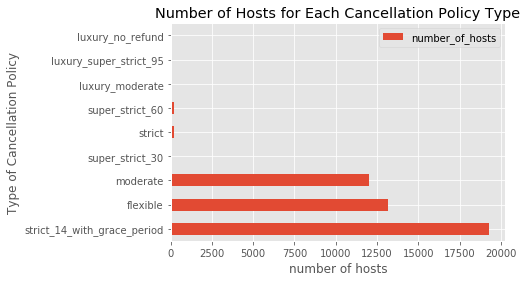

In [9]:
# Your code to answer Question 4
df["cancellation_policy"].unique()
dict={}
dict['strict_14_with_grace_period']=0
dict['flexible']=0
dict['moderate']=0
dict['super_strict_30']=0
dict['strict']=0
dict['super_strict_60']=0
dict['luxury_moderate']=0
dict['luxury_super_strict_95']=0
dict['luxury_no_refund']=0
for m in df["cancellation_policy"]:
    dict[m]+=1
dict

keys = []
for key in dict.keys():
    keys.append(key)
values = []
for value in dict.values():
    values.append(value)

data = {"number_of_hosts":values,"policy_type":keys}
df_cp = pd.DataFrame(data)

fig = df_cp.plot(kind= "barh", x = "policy_type", y = "number_of_hosts")
fig.set(title = "Number of Hosts for Each Cancellation Policy Type", xlabel="number of hosts", ylabel= "Type of Cancellation Policy")

#Most hosts choose to use the cancellation policy of strict 14 with grace period, 
#there is also a large amount of hosts who choose flexible and moderate type of cancellation
#polciy. However, little or no hosts choose luxury no refund, luxury super strict 95, 
#luxury moderate, super strict 60, strict and super strict 30

In [9]:
# Your code to answer Question 5
%matplotlib inline
df_host = df.drop_duplicates(keep="first",subset=["host_id"])
df_host = df_host[["property_type","room_type","review_scores_rating","price"]]
# df_host.isnull().sum()
mean_rating = df_host.review_scores_rating.mean()
df_host.fillna({"review_scores_rating":mean_rating},inplace = True)

sub_1 = pd.DataFrame(df_host.groupby(by = ["property_type"])["review_scores_rating"].mean())
sub_1 = sub_1.sort_values(by="review_scores_rating" , ascending=False)[:10]
sub_1

sub_2= pd.DataFrame(df_host.groupby(by = ["room_type"])["review_scores_rating"].mean())
sub_2 = sub_2.sort_values(by="review_scores_rating" , ascending=False)
sub_2

#The first form shows the top 10 ratings for different types of properties.
#The second form shows the rating ranks for 4 room types.

,review_scores_rating
property_type,
Bus,100.000000
Campsite,100.000000
Dome house,99.750000
Tipi,98.410467
Train,98.000000
Chalet,97.705233
Yurt,97.646280
Island,97.615700
Casa particular (Cuba),97.615700


,review_scores_rating
room_type,
Private room,95.312621
Entire home/apt,95.288790
Shared room,92.350025
Hotel room,89.716646


## Executive Summary
**(You need to use this cell to write your executive summary)**
As 2019 is coming to a close, it is crucial for Airbnb to review what happened over the past year, thus better prepared for the future, especially, for the initial public Offering in 2020.
In order to serve this goal, we analyzed the listings data in Los Angelos on 14 September 2019 and came up with several interesting findings. 
As for keywords in amenities, "Wi-fi", "Essentials", "Smoke Detector" were the top 3 included amenities in the listing. This reflects how technology, convenience, and safety play a role in people finding a living space.
Besides, it has also been found that special types of housing are more likely to receive high review ratings, such as "Bus" and "Campsite", which both received 100% satisfaction. Perhaps it is because people are looking for housing that enables them to try special living styles, and Airbnb is the platform they would choose. In addition, nowadays people are more sensitive to have private space. It is supported that private room and entire home/apartment receive the highest ratings among all the room choices. 
In conclusion, Airbnb should encourage hosts to provide listings that are more creative, that is special, and that guarantees private space.